In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib as mpl
import numpy as np
import scipy as sp
import json
import sys

df = pd.read_csv('autoinhibition_protein_data/project_pipeline/data/classified_files.tsv', sep='\t').astype('object')
df.head()

,uniprot,pdb,complex_rmsd,1.0_aligned,1.0_comp,1.1_aligned,1.1_comp,1.2_aligned,1.2_comp,2.0_aligned,...,2.3_aligned,2.3_comp,percent_region_1,percent_region_2,1_aligned,1_comp,2_aligned,2_comp,state,conformation
0,A0A0R4I961,6gu0,2.105,0.828,3.285,0.0,0.0,0.0,0.0,1.788,...,0.0,0.0,100.0,100.0,0.828,3.285,1.788,4.298,Active,Open
1,D2AJU0,6lol,3.539,0.945,10.505,0.0,0.0,0.0,0.0,2.829,...,0.0,0.0,100.0,81.694915,0.945,10.505,2.829,7.86,Autoinhibited,Open
2,O00571,4pxa,5.602,2.581,11.686,0.0,0.0,0.0,0.0,4.726,...,0.0,0.0,94.0,100.0,2.581,11.686,4.726,10.35,Active,Closed
3,O00571,6cz5,5.177,3.13,12.018,0.0,0.0,0.0,0.0,4.414,...,0.0,0.0,82.0,97.808219,3.13,12.018,4.414,9.44,Inhibited,Closed
4,O08722,3g5b,0.922,0.872,1.006,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,100.0,0.872,1.006,0.9585,0.927,Autoinhibited,NaN


In [3]:
top_50 = df.sort_values(by='complex_rmsd', ascending=False)[:50].reset_index()
top_50.head()

,index,uniprot,pdb,complex_rmsd,1.0_aligned,1.0_comp,1.1_aligned,1.1_comp,1.2_aligned,1.2_comp,...,2.3_aligned,2.3_comp,percent_region_1,percent_region_2,1_aligned,1_comp,2_aligned,2_comp,state,conformation
0,262,P35609,4d1e,113.774,3.48,232.052,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,100.0,3.48,232.052,4.342,220.629,Autoinhibited,Closed
1,792,Q8TCU6,7syf,39.011,1.557,33.557,0.0,0.0,0.0,0.0,...,0.0,0.0,95.604396,92.038217,1.557,33.557,1.943,50.531,Autoinhibited,Open
2,734,Q8NQJ3,2kb4,30.559,10.366,56.73,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,100.0,10.366,56.73,2.45,61.648,Active,Open
3,759,Q8NQJ3,2kb4,30.559,10.366,56.73,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,100.0,10.366,56.73,2.45,61.648,Active,Open
4,736,Q8NQJ3,2kb4,30.559,10.366,56.73,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,100.0,10.366,56.73,2.45,61.648,Active,Open


In [85]:
print(len(pd.unique(df['uniprot'])))

81


In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('ggplot')

<Axes: xlabel='2.0_aligned', ylabel='2.0_comp'>

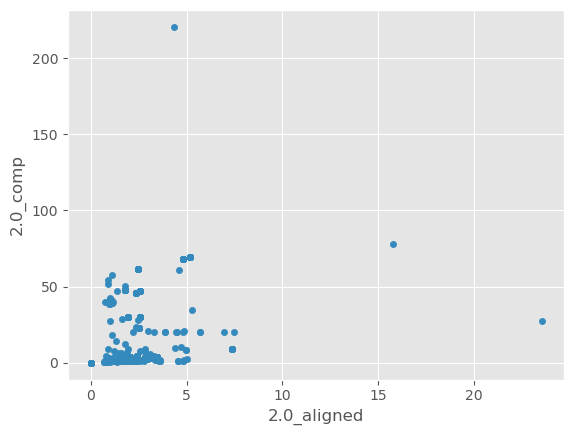

In [6]:
df.plot(kind='scatter', y='2.0_comp', x='2.0_aligned')

<Axes: xlabel='2.0_aligned', ylabel='2.0_comp'>

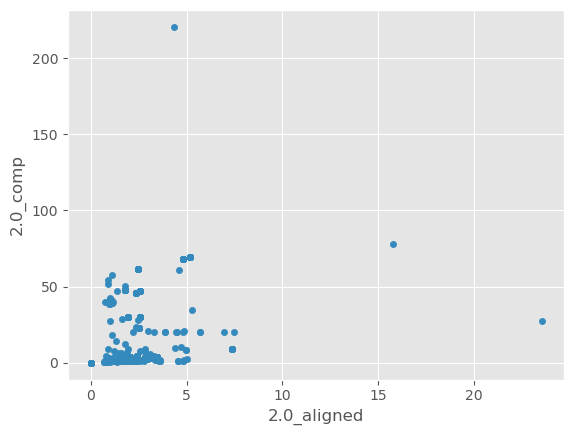

In [7]:
fig, ax = plt.subplots()
df.plot(kind='scatter', y='2.0_comp', x='2.0_aligned', ax=ax, )

(0.0, 25.0)

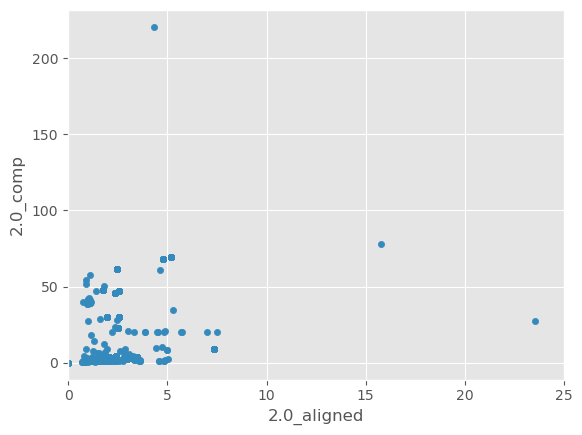

In [8]:
fig, ax = plt.subplots()
df.plot(kind='scatter', y='2.0_comp', x='2.0_aligned', ax=ax)
ax.set_xlim([0, 25])

[Text(0.5, 1.0, 'Rmsds of Proteins Aligned at Domain'),
 Text(0.5, 0, 'Domain RMSD'),
 Text(0, 0.5, 'Tail RMSD')]

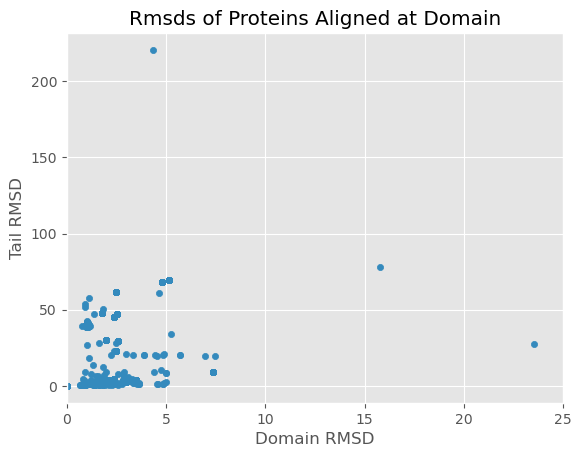

In [9]:
fig, ax = plt.subplots()
df.plot(kind='scatter', y='2.0_comp', x='2.0_aligned', ax=ax)
ax.set_xlim([0, 25])
ax.set(title='Rmsds of Proteins Aligned at Domain', xlabel='Domain RMSD', ylabel='Tail RMSD')

Q96P20
P62826


/tmp/ipykernel_132110/3786621602.py:20: UserWarning: 
The palette list has fewer values (9) than needed (25) and will cycle, which may produce an uninterpretable plot.
  ax1 = sns.scatterplot(data=df_1, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)
/tmp/ipykernel_132110/3786621602.py:23: UserWarning: 
The palette list has fewer values (9) than needed (17) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.scatterplot(data=df_2, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)
/tmp/ipykernel_132110/3786621602.py:26: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  ax3 = sns.scatterplot(data=df_3, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)
/tmp/ipykernel_132110/3786621602.py:33: UserWarning: 
The palette list has fewer values (9) than needed (23) and will cycle, which may produce an uninterpretable plot.
  ax4 = sns.scatterplot(data=df_4, 

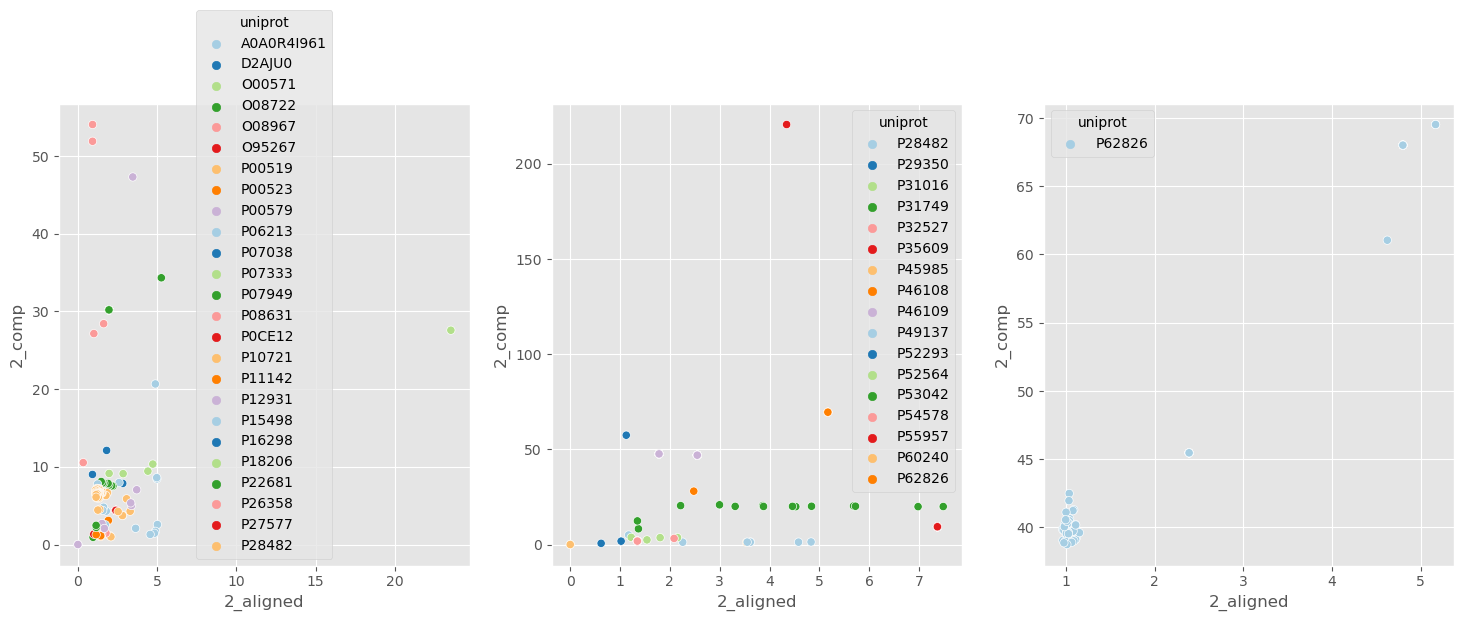

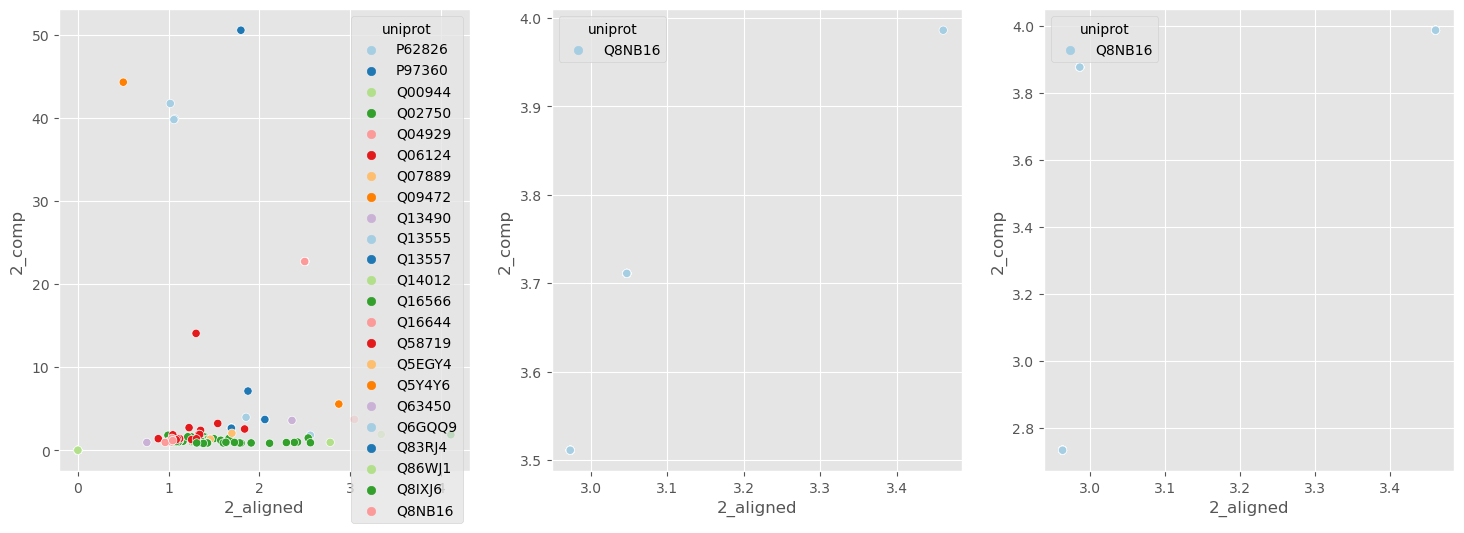

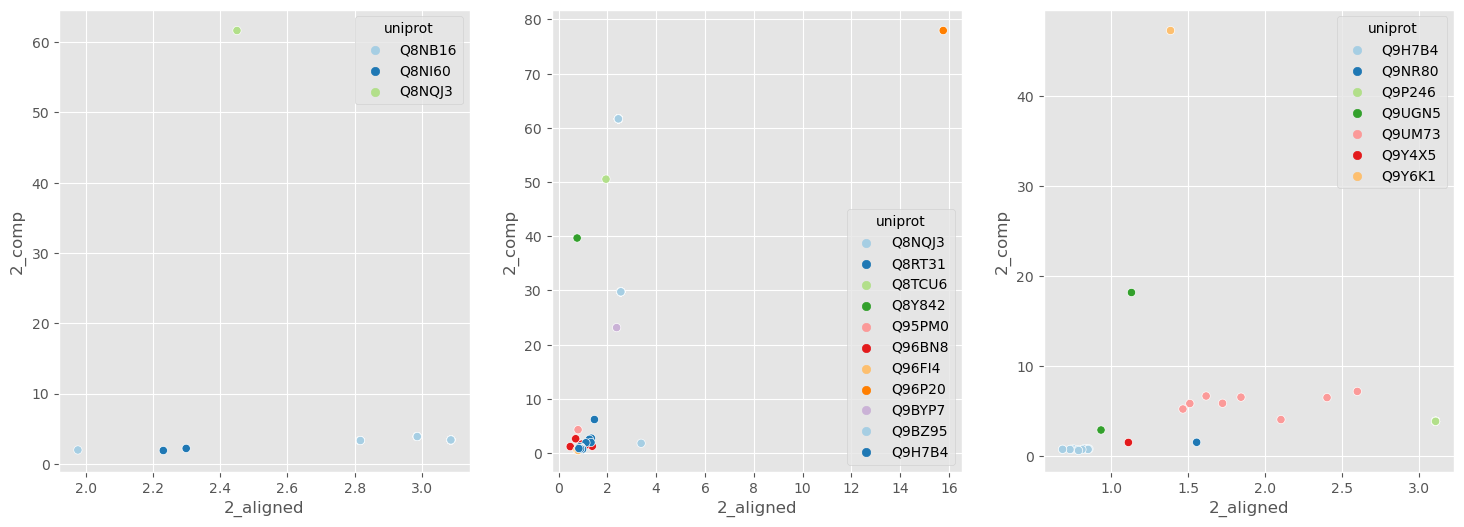

In [10]:
df_avg = df[['uniprot', '1_aligned', '1_comp', '2_aligned', '2_comp']]
uniprot_unique = df_avg['uniprot'].unique()
print(uniprot_unique[71])
print(df_avg.loc[337, 'uniprot'])

df_1 = df_avg[:225]
df_2 = df_avg[225:338]
df_3 = df_avg[338:421]
df_4 = df_avg[421:593]
df_5 = df_avg[593:628]
df_6 = df_avg[628:681]
df_7 = df_avg[681:731]
df_8 = df_avg[731:820]
df_9 = df_avg[820:]

brewer = sns.color_palette('Paired', 9)

f = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.scatterplot(data=df_1, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.scatterplot(data=df_2, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.scatterplot(data=df_3, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)

# plt.savefig('group1.png')

f2 = plt.figure(figsize=(18, 6))

ax4 = plt.subplot(1, 3, 1)
ax4 = sns.scatterplot(data=df_4, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)

ax5 = plt.subplot(1, 3, 2)
ax5 = sns.scatterplot(data=df_5, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)

ax6 = plt.subplot(1, 3, 3)
ax6 = sns.scatterplot(data=df_6, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)

# plt.savefig('group2.png')

f3 = plt.figure(figsize=(18, 6))

ax7 = plt.subplot(1, 3, 1)
ax7 = sns.scatterplot(data=df_7, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)

ax8 = plt.subplot(1, 3, 2)
ax8 = sns.scatterplot(data=df_8, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)

ax9 = plt.subplot(1, 3, 3)
ax9 = sns.scatterplot(data=df_9, x='2_aligned', y='2_comp', hue='uniprot', legend='brief', palette=brewer)


/tmp/ipykernel_132110/1552774169.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outlier = df_no_null[df.complex_rmsd != 113.774]


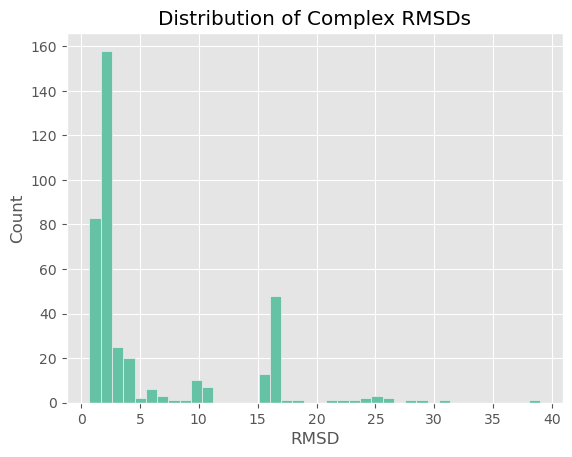

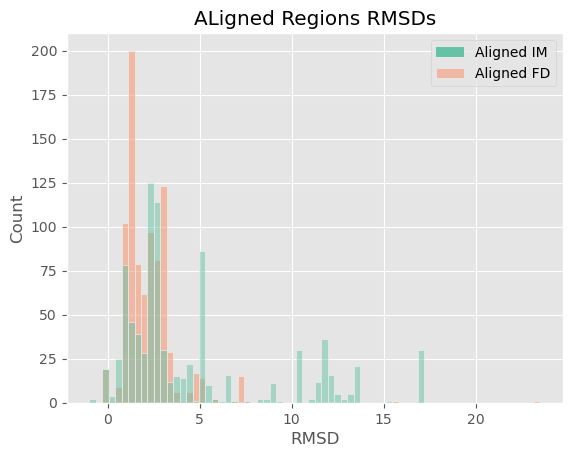

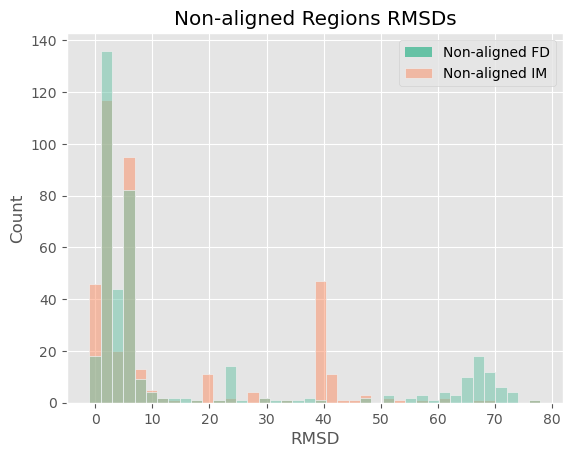

In [11]:
df_1_aligned = df[['1_aligned']]
df_2_aligned = df[['2_aligned']]
df_aligned = df[['1_aligned', '2_aligned']]
df_no_null = df[df['conformation'].isnull() == False].drop_duplicates()
df_no_outlier = df_no_null[df.complex_rmsd != 113.774]
df_all_aligned = df_no_outlier[['complex_rmsd']]
df_comp = df_no_outlier[['1_comp', '2_comp']]
# plt.savefig('group3.png')
sns.set_palette('Set2')

f1, ax = plt.subplots()
sns.histplot(data=df_all_aligned, bins=40, ax=ax, alpha=None, legend=None)
ax.set_xlabel('RMSD')
ax.set_title('Distribution of Complex RMSDs')
plt.show()

f1.savefig('complex_rmsds.png')

f2, ax = plt.subplots()
sns.histplot(data=df_aligned, ax=ax)
plt.legend(['Aligned IM', 'Aligned FD'])
ax.set_title('ALigned Regions RMSDs')
ax.set_xlabel('RMSD')
plt.show()

f2.savefig('aligned_rmsds.png')

f3, ax = plt.subplots()
sns.histplot(data=df_comp, bins=40, ax=ax)
ax.set_xlabel('RMSD')
ax.set_title('Non-aligned Regions RMSDs')
ax.legend(['Non-aligned FD', 'Non-aligned IM'])

f3.savefig('non-aligned_rmsds.png')



249
138


/tmp/ipykernel_132110/2797705731.py:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_no_outlier, x='2_aligned', y='2_comp', hue='conformation', legend='brief', palette=brewer, ax=ax[0])
/tmp/ipykernel_132110/2797705731.py:32: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_no_outlier, x='2_aligned', y='2_comp', hue='conformation', legend='brief', palette=brewer, ax=ax[1])


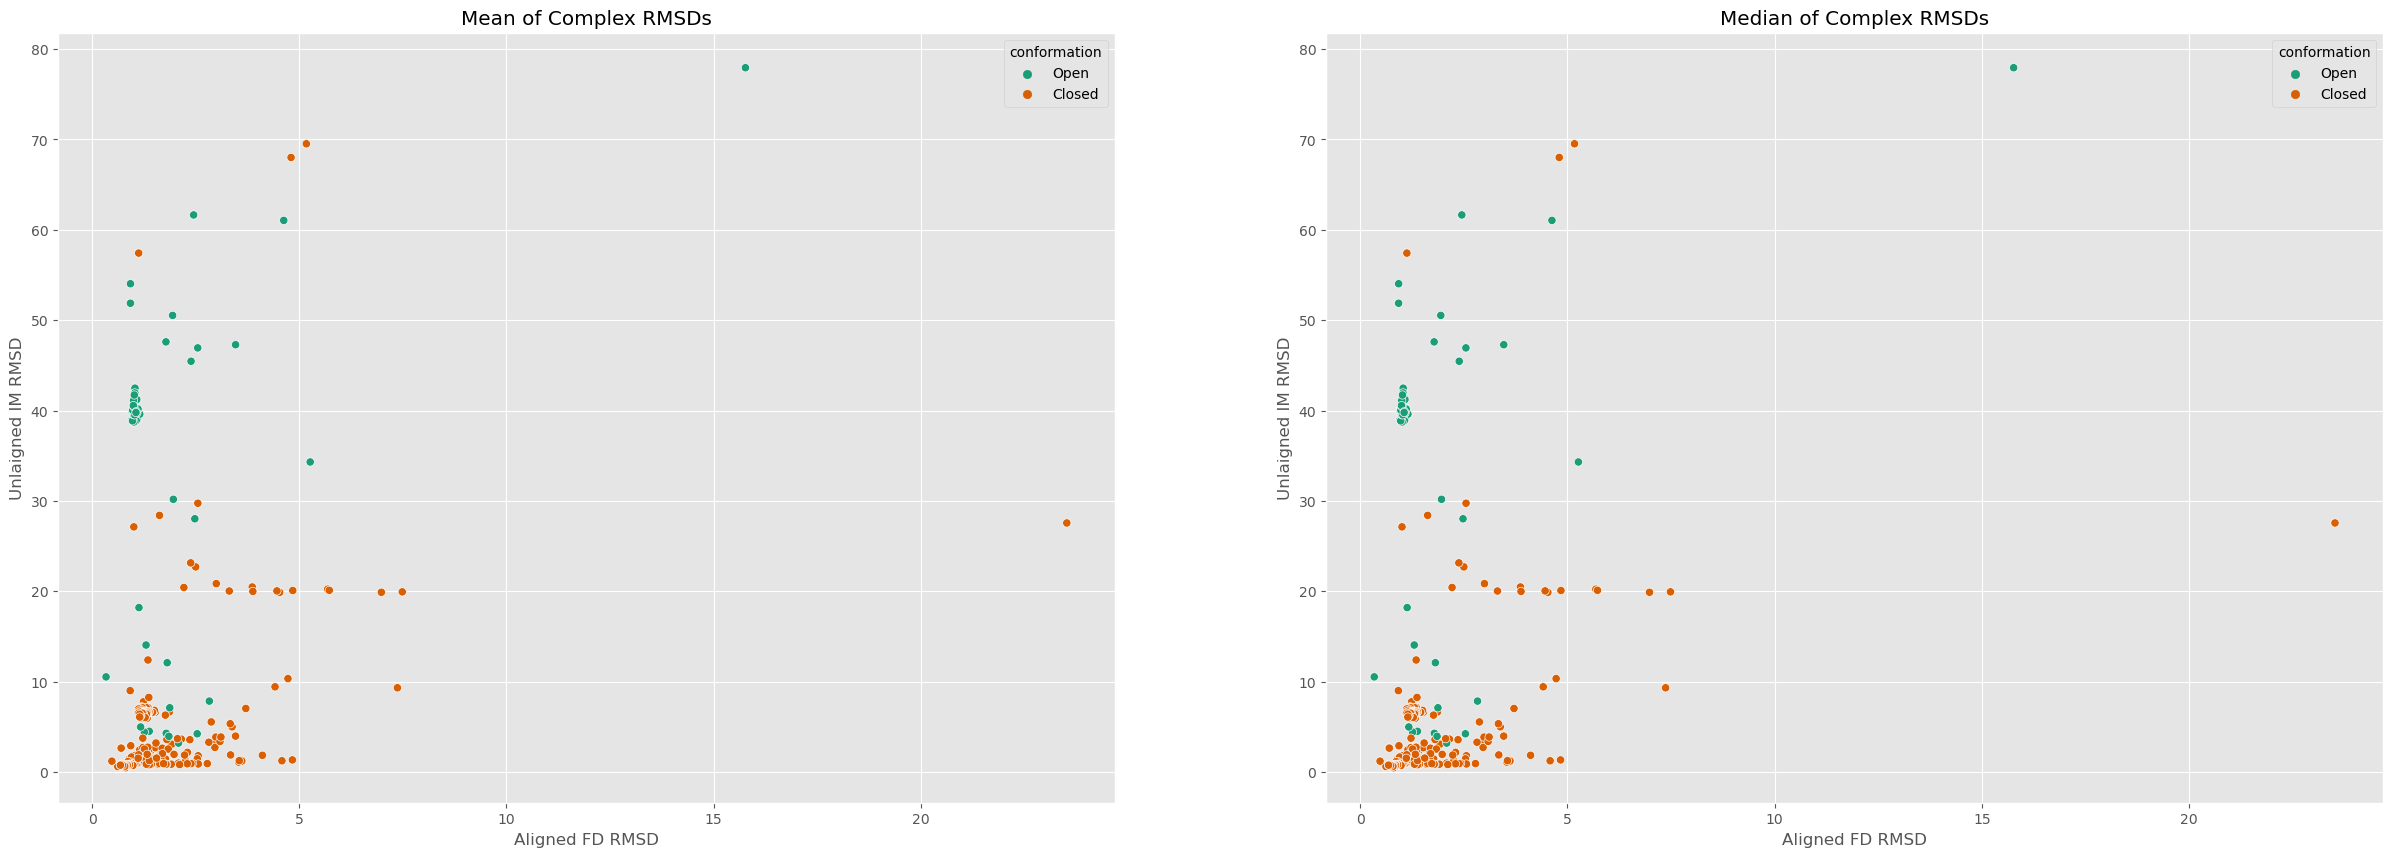

In [12]:
df_classified = df.sort_values(by='conformation', ascending=False)
df_categ = df_classified[['2_aligned', '2_comp', 'conformation']]

df_auto = df_no_outlier.loc[df['conformation'] == 'Autoinhibited']
df_active = df_no_outlier.loc[df['conformation'] == 'Active']
active_median_1 = df_active['2_comp'].median(axis=0)
active_median_2 = df_active['2_aligned'].median(axis=0)
auto_median_1 = df_auto['2_comp'].median(axis=0)
auto_median_2 = df_auto['2_aligned'].median(axis=0)
active_mean_1 = df_active['2_comp'].mean(axis=0)
active_mean_2 = df_active['2_aligned'].mean(axis=0)
auto_mean_1 = df_auto['2_comp'].mean(axis=0)
auto_mean_2 = df_auto['2_aligned'].mean(axis=0)

brewer = sns.color_palette('Dark2', 4)
active_color = brewer[0]
auto_color = brewer[1]

print(df_no_outlier['state'].value_counts()['Autoinhibited'])
print(df_no_outlier['state'].value_counts()['Active'])

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
sns.scatterplot(data=df_no_outlier, x='2_aligned', y='2_comp', hue='conformation', legend='brief', palette=brewer, ax=ax[0])
ax[0].set_title('Mean of Complex RMSDs')
ax[0].set_xlabel('Aligned FD RMSD')
ax[0].set_ylabel('Unlaigned IM RMSD')
ax[0].axvline(x=active_mean_2, color = active_color)
ax[0].axhline(y=active_mean_1, color = active_color)
ax[0].axvline(x=auto_mean_2, color = auto_color)
ax[0].axhline(y=auto_mean_1, color=auto_color)

sns.scatterplot(data=df_no_outlier, x='2_aligned', y='2_comp', hue='conformation', legend='brief', palette=brewer, ax=ax[1])
ax[1].set_title('Median of Complex RMSDs')
ax[1].set_xlabel('Aligned FD RMSD')
ax[1].set_ylabel('Unlaigned IM RMSD')
ax[1].axvline(x=active_median_2, color = active_color)
ax[1].axhline(y=active_median_1, color = active_color)
ax[1].axvline(x=auto_median_2, color = auto_color)
ax[1].axhline(y=auto_median_1, color=auto_color)

plt.savefig('means_and_medians_of_compared_structures.png')
plt.show()

/tmp/ipykernel_132110/4221357532.py:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_no_outlier, x='2_aligned', y='2_comp', palette=brewer, hue=df_no_outlier['conformation'], ax=g.ax_joint)


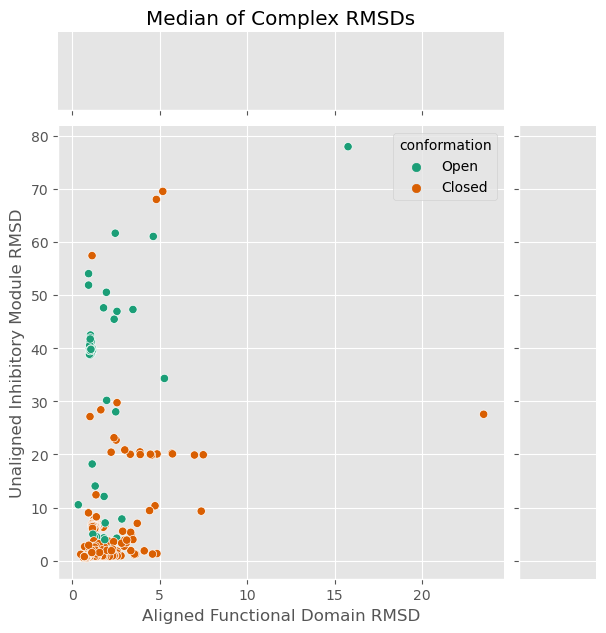

In [13]:
xactive = df_active['2_aligned']
xauto = df_auto['2_aligned']
yactive = df_active['2_comp']
yauto = df_auto['2_comp']
g = sns.JointGrid()
sns.scatterplot(data=df_no_outlier, x='2_aligned', y='2_comp', palette=brewer, hue=df_no_outlier['conformation'], ax=g.ax_joint)
g.ax_joint.axvline(x=active_median_2, color=active_color)
g.ax_joint.axhline(y=active_median_1, color = active_color)
g.ax_joint.axvline(x=auto_median_2, color = auto_color)
g.ax_joint.axhline(y=auto_median_1, color=auto_color)
g.ax_joint.set_xlabel('Aligned Functional Domain RMSD')
g.ax_joint.set_ylabel('Unaligned Inhibitory Module RMSD')
g.ax_marg_x.set_title('Median of Complex RMSDs')

for a in [xactive, xauto]:
    sns.histplot(x=a, ax=g.ax_marg_x, stat='percent', alpha=0.5)
# sns.histplot(x=x, ax=g.ax_marg_x, palette=brewer, multiple='dodge', hue=df_no_outlier['conformation'], stat='probability')
for b in [yactive, yauto]:
    sns.histplot(y=b, ax=g.ax_marg_y, stat='percent', alpha=0.5)
# sns.histplot(y=y, ax=g.ax_marg_y, palette=brewer, multiple='dodge', hue=df_no_outlier['conformation'])
plt.show()
g.savefig('joint_plot_with_medians.png')

/tmp/ipykernel_132110/197398053.py:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_no_outlier, x='2_aligned', y='2_comp', palette=brewer, hue=df_no_outlier['conformation'], ax=g2.ax_joint)


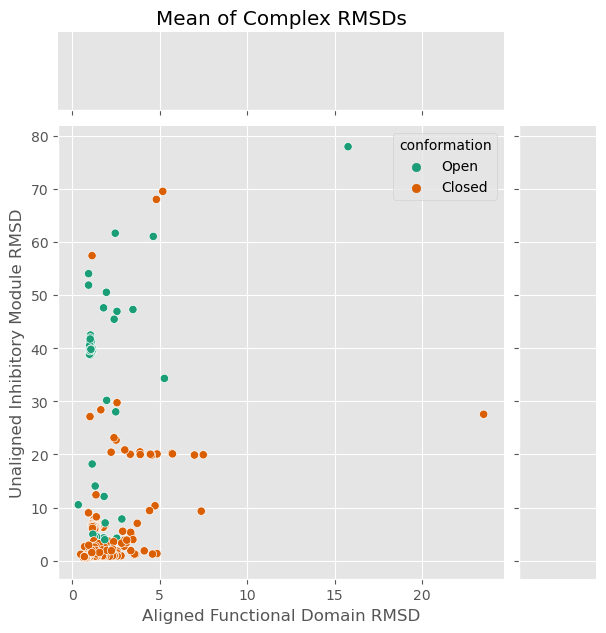

In [14]:
xactive = df_active['2_aligned']
xauto = df_auto['2_aligned']
yactive = df_active['2_comp']
yauto = df_auto['2_comp']
g2 = sns.JointGrid()
sns.scatterplot(data=df_no_outlier, x='2_aligned', y='2_comp', palette=brewer, hue=df_no_outlier['conformation'], ax=g2.ax_joint)
g2.ax_joint.axvline(x=active_mean_2, color=active_color)
g2.ax_joint.axhline(y=active_mean_1, color = active_color)
g2.ax_joint.axvline(x=auto_mean_2, color = auto_color)
g2.ax_joint.axhline(y=auto_mean_1, color=auto_color)
g2.ax_joint.set_xlabel('Aligned Functional Domain RMSD')
g2.ax_joint.set_ylabel('Unaligned Inhibitory Module RMSD')
g2.ax_marg_x.set_title('Mean of Complex RMSDs')

for a in [xactive, xauto]:
    sns.histplot(x=a, ax=g2.ax_marg_x, stat='percent', alpha=0.5)
# sns.histplot(x=x, ax=g.ax_marg_x, palette=brewer, multiple='dodge', hue=df_no_outlier['conformation'], stat='probability')
for b in [yactive, yauto]:
    sns.histplot(y=b, ax=g2.ax_marg_y, stat='percent', alpha=0.5)
# sns.histplot(y=y, ax=g.ax_marg_y, palette=brewer, multiple='dodge', hue=df_no_outlier['conformation'])
plt.show()
g2.savefig('joint_plot_with_means.png')

The fraction of closed structures within 2.5 A is 0.03389830508474576, The fraction of open structures with RMSD greater than 2.5 is 0.43728813559322033


/home/bjechow/anaconda3/envs/rmsd_snek/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bjechow/anaconda3/envs/rmsd_snek/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


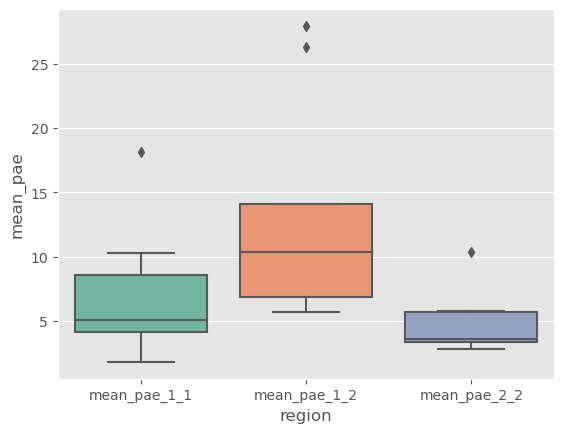

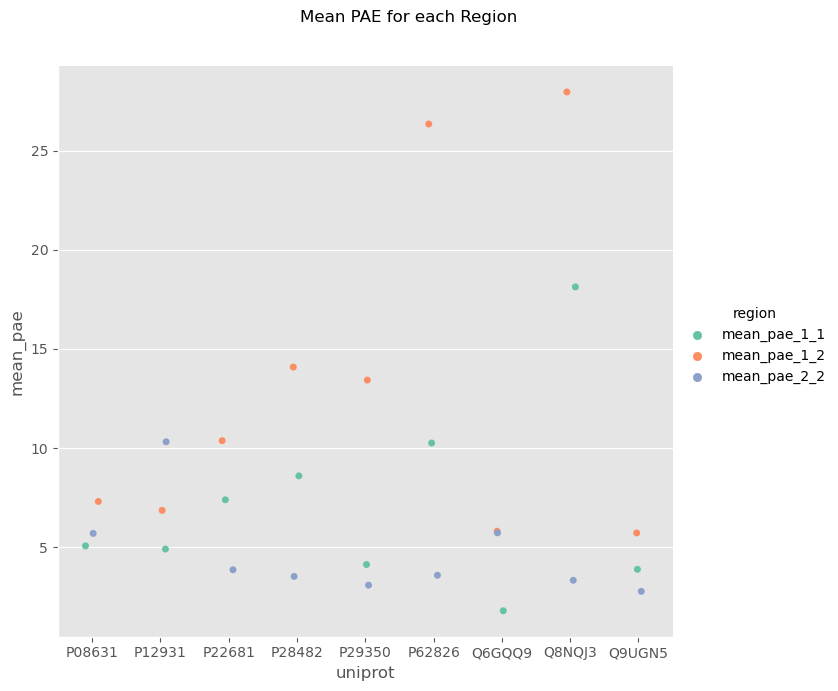

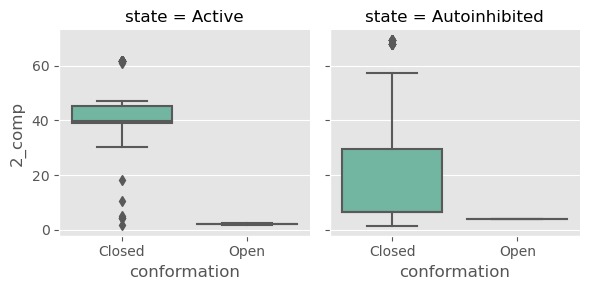

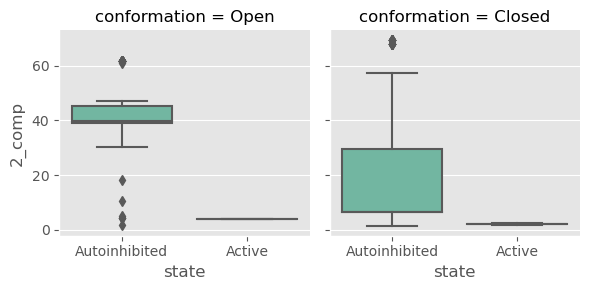

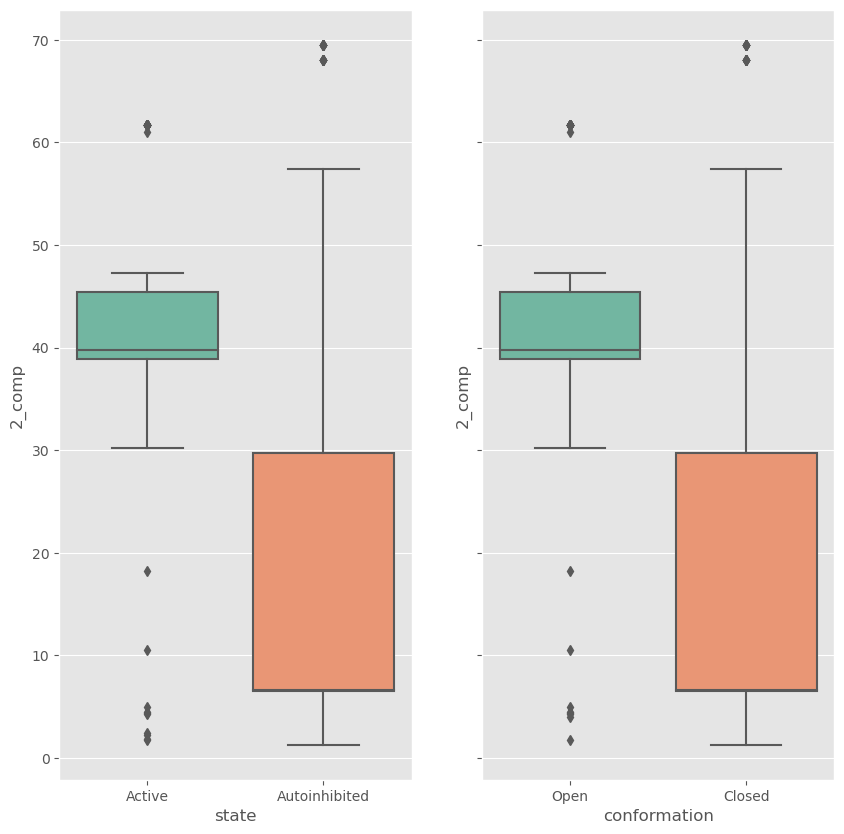

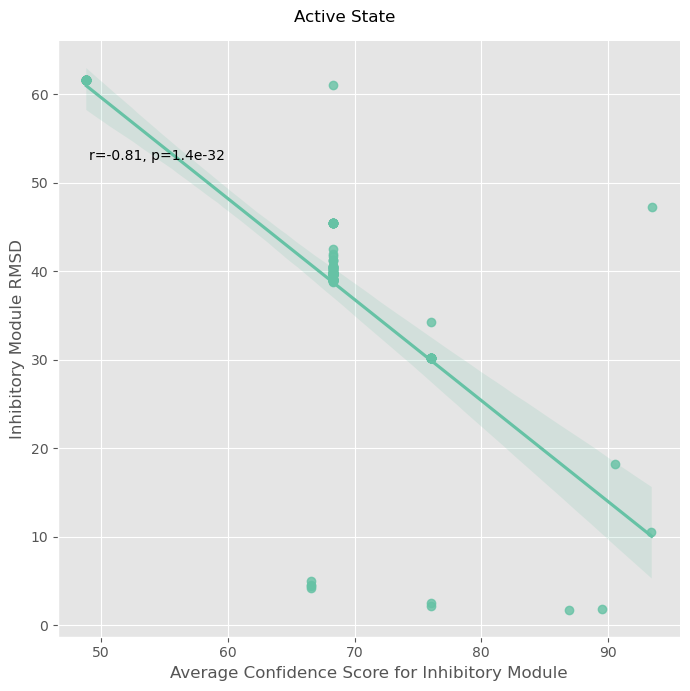

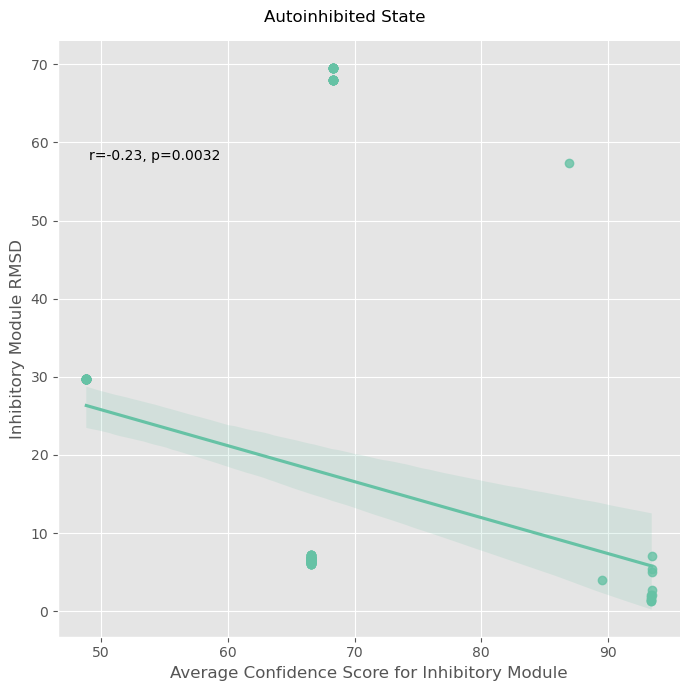

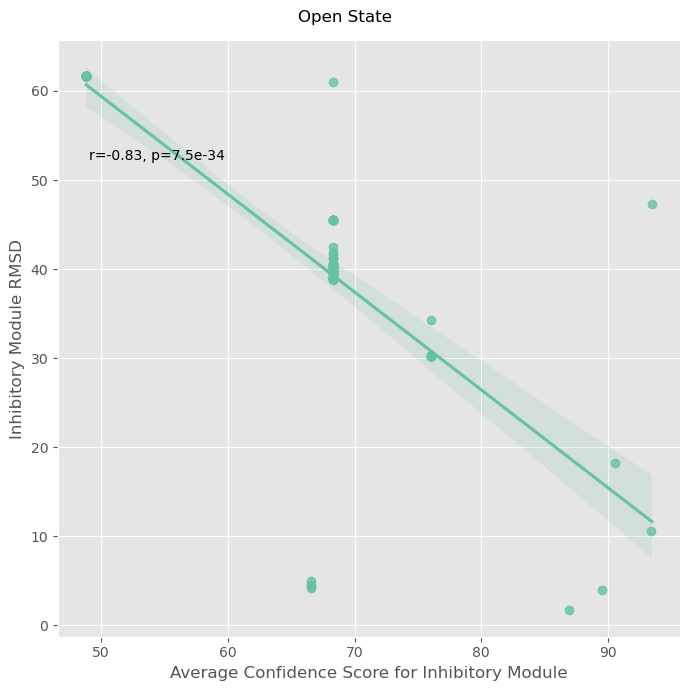

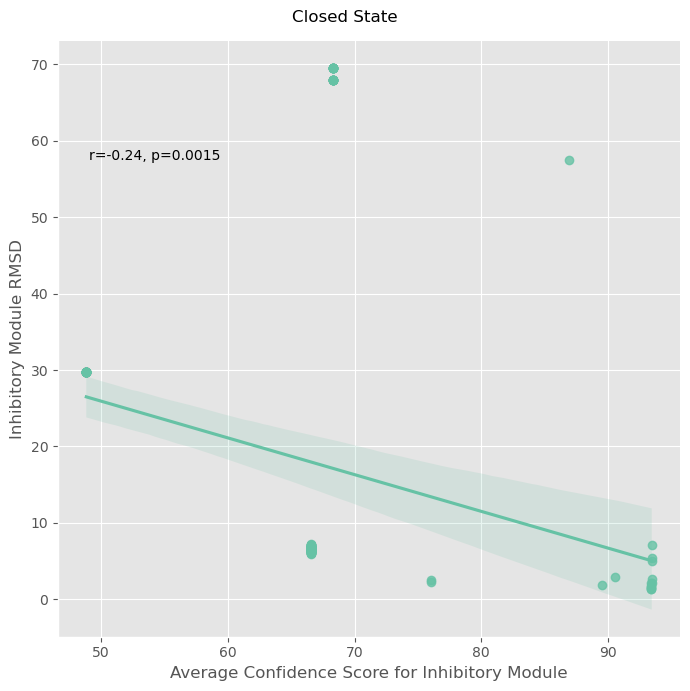

In [57]:
# This is for calculating percent that are within 2.5A of closed position. 
df_disorder = pd.read_csv('./autoinhibition_protein_data/project_pipeline/data/disorder.tsv', sep='\t').astype('object')
df_pae = df_disorder[['uniprot', 'mean_pae_1_1', 'mean_pae_1_2', 'mean_pae_2_2']]
df_pae = df_pae.drop_duplicates()
df_melt = df_pae.melt(id_vars=['uniprot'], var_name='region', value_name='mean_pae')

plot1 = sns.boxplot(data=df_melt, x='region', y='mean_pae', width=0.8)

plot = sns.catplot(data=df_melt, x='uniprot', y='mean_pae', hue='region', height=7, aspect=1)
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Mean PAE for each Region')

df_disorder = df_disorder.astype({'region_1_mean_plddt': 'float', '2_comp': 'float'})
df_active = df_disorder[df_disorder['state'] == 'Active']
df_autoin = df_disorder[df_disorder['state'] == 'Autoinhibited']
df_open = df_disorder[df_disorder['conformation'] == 'Open']
df_closed = df_disorder[df_disorder['conformation'] == 'Closed']
df_correct_closed = df_disorder[(df_disorder['conformation'] == 'Closed') & (df_disorder['2_comp'] < 2.5)]
df_far_open = df_disorder[(df_disorder['conformation'] == 'Open') & (df_disorder['2_comp'] > 2.5)]
fraction_closed = len(df_correct_closed) / len(df_disorder)
fraction_open = len(df_far_open) / len(df_disorder)
print(f'The fraction of closed structures within 2.5 A is {fraction_closed}, The fraction of open structures with RMSD greater than 2.5 is {fraction_open}')
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.regplot(data=df_active, x='region_1_mean_plddt', y='2_comp')
# ax.set_ylabel('Inhibitory Module RMSD')
# ax.set_xlabel('Average Confidence Score for Inhibitory Module')
# ax.set_title('Confidence vs Accuracy of AlphaFold2 IM Predictions')

g4 = sns.FacetGrid(data=df_disorder, col='state')
g4.map(sns.boxplot, 'conformation', '2_comp')

g5 = sns.FacetGrid(data=df_disorder, col='conformation')
g5.map(sns.boxplot, 'state', '2_comp')

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)

sns.boxplot(ax=axes[0], data=df_disorder, x='state', y='2_comp')

sns.boxplot(ax=axes[1], data=df_disorder, x='conformation', y='2_comp')


g2 = sns.lmplot(x='region_1_mean_plddt', y='2_comp', data=df_open, height=7, aspect=1)
g2.set_axis_labels('Average Confidence Score for Inhibitory Module', 'Inhibitory Module RMSD')
g2.fig.suptitle('Open State')

g3 = sns.lmplot(x = 'region_1_mean_plddt', y='2_comp', data=df_closed, height=7, aspect=1)
g3.set_axis_labels('Average Confidence Score for Inhibitory Module', 'Inhibitory Module RMSD')
g3.fig.suptitle('Closed State')

g = sns.lmplot(x='region_1_mean_plddt', y='2_comp', data=df_active, height=7, aspect=1)
g.set_axis_labels('Average Confidence Score for Inhibitory Module', 'Inhibitory Module RMSD')
g.fig.suptitle('Active State')

g1 = sns.lmplot(x='region_1_mean_plddt', y='2_comp', data=df_autoin, height=7, aspect=1)
g1.set_axis_labels('Average Confidence Score for Inhibitory Module', 'Inhibitory Module RMSD')
g1.fig.suptitle('Autoinhibited State')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['region_1_mean_plddt'], data['2_comp'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g1.map_dataframe(annotate)
g2.map_dataframe(annotate)
g3.map_dataframe(annotate)

['P08631' 'P12931' 'P22681' 'P28482' 'P29350' 'Q6GQQ9' 'Q9UGN5']
Percent closed: 22.222
Percent closed: 50.0


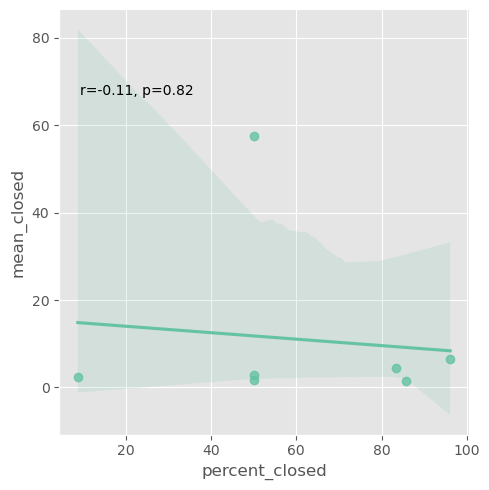

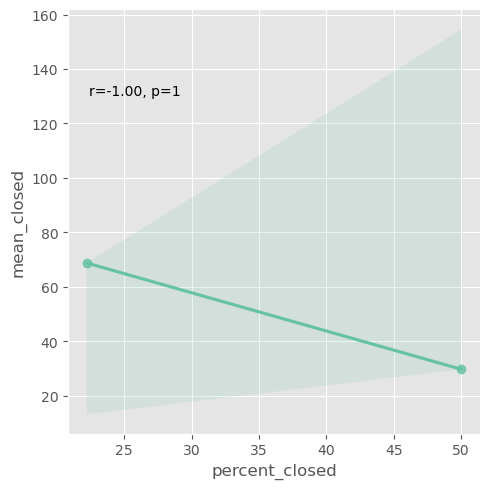

In [58]:
df_structured = df_disorder[df_disorder['ar_disorder'] == 'structured']
df_disordered = df_disorder[df_disorder['ar_disorder'] == 'disordered']

uniprot_dict = {}
uniprots = df_structured['uniprot'].unique()
print(uniprots)
for uniprot in uniprots:
    uniprot_df = df_structured[df_structured['uniprot'] == uniprot]
    num_closed = len(uniprot_df[uniprot_df['conformation'] == 'Closed'])
    mean_closed = round(uniprot_df[uniprot_df['conformation'] == 'Closed']['2_comp'].mean(), 3)
    num_open = len(uniprot_df[uniprot_df['conformation'] == 'Open'])
    mean_open = round(uniprot_df[uniprot_df['conformation'] == 'Open']['2_comp'].mean(), 3)
    percent_closed = round((num_closed / (num_closed + num_open)) * 100, 3)
    percent_open = round((num_open / (num_closed + num_open)) * 100, 3)
    uniprot_dict[uniprot] = {'percent_closed': percent_closed, 'mean_closed': mean_closed, 'percent_open': percent_open, 'mean_open': mean_open}

uniprot1_dict = {}
uniprots1 = df_disordered['uniprot'].unique()
for uniprot in uniprots1:
    uniprot1_df = df_disordered[df_disordered['uniprot'] == uniprot]
    num_closed = len(uniprot1_df[uniprot1_df['conformation'] == 'Closed'])
    mean_closed = round(uniprot1_df[uniprot1_df['conformation'] == 'Closed']['2_comp'].mean(), 3)
    num_open = len(uniprot1_df[uniprot1_df['conformation'] == 'Open'])
    mean_open = round(uniprot1_df[uniprot1_df['conformation'] == 'Open']['2_comp'].mean(), 3)
    percent_closed = round((num_closed / (num_closed + num_open)) * 100, 3)
    print('Percent closed: %s' % percent_closed)
    percent_open = round((num_open / (num_closed + num_open)) * 100, 3)
    uniprot1_dict[uniprot] = {'percent_closed': percent_closed, 'mean_closed': mean_closed, 'percent_open': percent_open, 'mean_open': mean_open}


perc_df_struct = pd.DataFrame.from_dict(uniprot_dict, orient='index')
perc_df_disor = pd.DataFrame.from_dict(uniprot1_dict, orient='index')


g = sns.lmplot(data=perc_df_struct, x='percent_closed', y='mean_closed')
g1 = sns.lmplot(data=perc_df_disor, x='percent_closed', y='mean_closed')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['percent_closed'], data['mean_closed'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

g.map_dataframe(annotate)
g1.map_dataframe(annotate)
plt.show()

In [81]:
df_disorder = pd.read_csv('./autoinhibition_protein_data/project_pipeline/data/disorder.tsv', sep='\t').astype('object')
df_proteins = pd.read_csv('./autoinhibition_protein_data/project_pipeline/data/proteins.tsv', sep='\t').astype('object')
uniprot_unique = df_disorder['uniprot'].unique()
minimum_values = []
for uniprot in uniprot_unique:
    uniprot_df = df_disorder[df_disorder['uniprot'] == uniprot]
    minimum_value = uniprot_df['2_comp'].min()
    minimum_values.append(minimum_value)
    print(minimum_value)

df_mins = df_disorder
for i in range(len(df_disorder)):
    if float(df_mins.loc[i, '2_comp']) not in minimum_values:
        df_mins.drop(index=i, inplace=True)

df_copy = df_mins.drop_duplicates(keep='first').reset_index()

def stringtolist(string):
    if ',' in string:
        bounds_str_list = string.split(',')
        bounds_int_list = []
        for bounds in bounds_str_list:
            bounds = bounds.split('-')
            bounds = [int(i) for i in bounds]
            for bound in bounds:
                bounds_int_list.append(bound)

    else:
        bounds_str_list = string.split('-')
        bounds_int_list = [int(i) for i in bounds_str_list]

    return bounds_int_list
 
# function to calculate
# Small result between
# two arrays
def findSmallestDifference(A, B, m, n):
 
    # Sort both arrays
    # using sort function
    A.sort()
    B.sort()
 
    a = 0
    b = 0
 
    # Initialize result as max value
    result = sys.maxsize
 
    # Scan Both Arrays upto
    # sizeof of the Arrays
    while (a < m and b < n):
     
        if (abs(A[a] - B[b]) < result):
            result = abs(A[a] - B[b])
 
        # Move Smaller Value
        if (A[a] < B[b]):
            a += 1
 
        else:
            b += 1
    # return final sma result
    return result
 
# Driver Code

print(df_copy)

for i in range(len(df_copy)):
    region_1 = df_copy.loc[i, 'region_1']
    region_2 = df_copy.loc[i, 'region_2']
    region_1_bounds = stringtolist(region_1)
    region_2_bounds = stringtolist(region_2)
    len1 = len(region_1_bounds)
    len2 = len(region_2_bounds)

    smallest_dif = findSmallestDifference(region_1_bounds, region_2_bounds, len1, len2)
    df_copy.loc[i, 'smallest_dif'] = smallest_dif

print(df_copy)
df_copy.to_csv('df_copy.tsv', sep='\t', index=False)

    

1.2925
2.074
2.208
4.245
1.765
38.741
1.809
29.752
2.92
   index uniprot   pdb complex_rmsd 2_aligned  2_comp          state  \
0      5  P08631  5h0b        2.212     1.415  1.2925  Autoinhibited   
1     12  P12931  4k11        1.254    1.6705   2.074  Autoinhibited   
2     34  P22681  4a4c         1.37     1.157   2.208         Active   
3    122  P28482  5ax3        2.147    2.5365   4.245         Active   
4    140  P29350  3ps5        1.444     1.021   1.765         Active   
5    216  P62826  6lq9       16.048     1.009  38.741         Active   
6    231  Q6GQQ9  5lrv        7.022     2.561   1.809         Active   
7    263  Q8NQJ3  2kb3       15.315     2.552  29.752  Autoinhibited   
8    294  Q9UGN5  4zzy        1.954     0.933    2.92            NaN   

  conformation         region_1        region_2 percent_region_1  \
0       Closed  142-239,240-259  76-136,425-514            100.0   
1       Closed  249-269,151-248  84-145,524-536            100.0   
2       Closed     